In [5]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [11]:
digits = load_digits()

In [18]:
X = digits.data
Y = digits.target

In [19]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


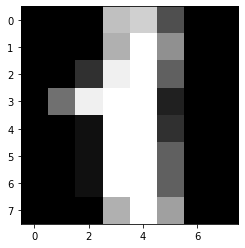

In [24]:
plt.imshow(X[1].reshape(8, 8), cmap = 'gray');

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2)

### applying naive bayes

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
model = MultinomialNB()

In [45]:
model = model.fit(X_train, Y_train)

In [46]:
model.score(X_train, Y_train)

0.906054279749478

In [47]:
model.score(X_test, Y_test)

0.8972222222222223

In [48]:
cross_val_score(model, X, Y, cv = 5, scoring='accuracy')

array([0.88736264, 0.83425414, 0.8551532 , 0.94677871, 0.83380282])

In [49]:
cross_val_score(model, X, Y, cv = 5, scoring='accuracy').mean()

0.8714703025475334

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(Y_test, model.predict(X_test))

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  4,  0,  0,  0,  0,  0,  5,  2],
       [ 0,  2, 29,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  1,  1,  3],
       [ 0,  0,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 31,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 19,  2],
       [ 0,  1,  0,  1,  0,  0,  0,  5,  1, 36]])

In [92]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [93]:
ypred = model.predict(X)
cnf_matrix = confusion_matrix(Y,ypred)


Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 139  14   0   0   1   2   0  14  12]
 [  0   7 159   0   0   0   0   0   9   2]
 [  0   0   2 158   0   2   0   4   9   8]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   2   0   0 175   2   0]
 [  0   9   1   0   1   0   1   1 156   5]
 [  0   3   0   1   0   1   0  11   7 157]]


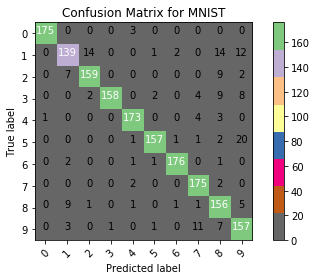

In [94]:
plot_confusion_matrix(cnf_matrix,classes=np.arange(10),normalize=False,title="Confusion Matrix for MNIST",cmap=plt.cm.Accent_r)
